<a href="https://colab.research.google.com/github/pratikagithub/All-About-Data-Analyst/blob/main/Analyzing_Screen_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Screen time analysis refers to analyzing the amount of time a user spends interacting with their device (such as a smartphone, tablet, or computer) and various applications on a daily, weekly, or monthly basis.

For the task of analyzing the screen time of a user, we need data about the app usage activity of a user on a particular device. I found an ideal dataset for this task, which contains features like:

Date: The date on which the data was recorded.

App: The name of the application being used (e.g., Instagram, WhatsApp).

Usage (minutes): The total number of minutes spent on the app daily.

Notifications: The number of notifications received from the app each day.

Times Opened: The number of times the app was opened on the recorded day.

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("/content/screentime_analysis (2).csv")

data.head()

Saving screentime_analysis (2).csv to screentime_analysis (2) (1).csv


,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


Let’s have a quick look at the summary statistics before moving forward:

In [3]:
data.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


Let’s start by analyzing the screen time trends of all the apps in the data over time:

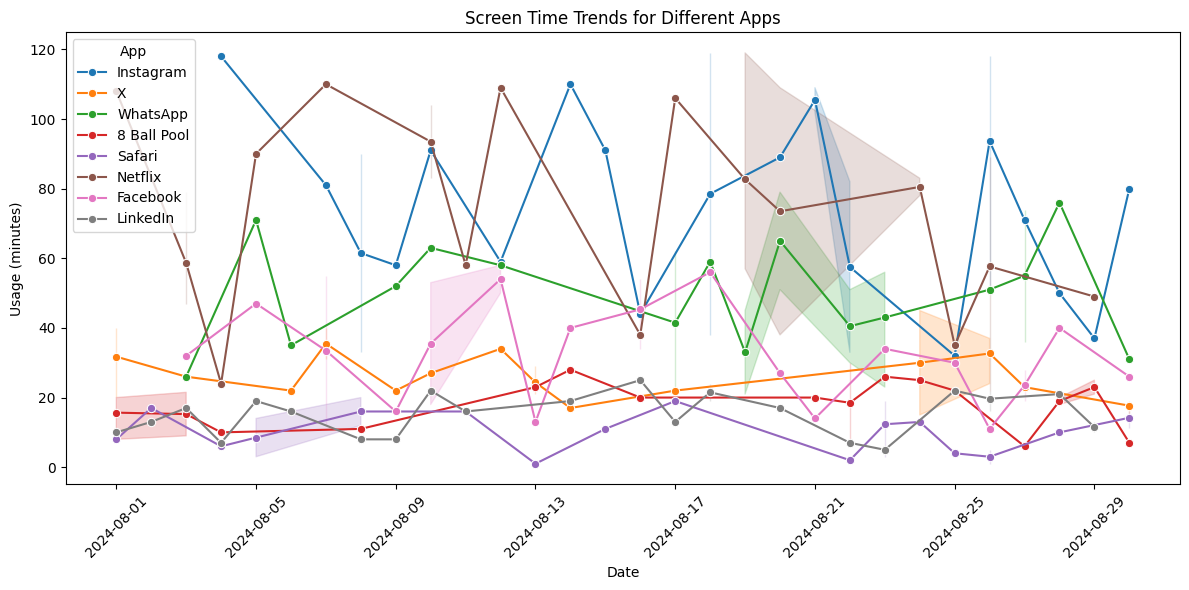

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usage (minutes)', hue='App', data=data, marker="o")
plt.title('Screen Time Trends for Different Apps')
plt.ylabel('Usage (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph illustrates the screen time usage of various apps throughout August 2024. Instagram shows the most fluctuating and high usage, peaking around mid-August and August 26. Apps like X, WhatsApp, and Netflix generally show lower and more consistent usage. Safari and 8 Ball Pool also show significant variability, with 8 Ball Pool reaching its highest point around August 11. LinkedIn and Facebook maintain relatively low and stable usage throughout the period. Overall, Instagram dominates screen time, while other apps experience occasional spikes but lower overall engagement.

Now, let’s have a look at the relationship between the screen time of the user, the number of notifications the user received, and the number of times the user opened any app:

<Figure size 800x600 with 0 Axes>

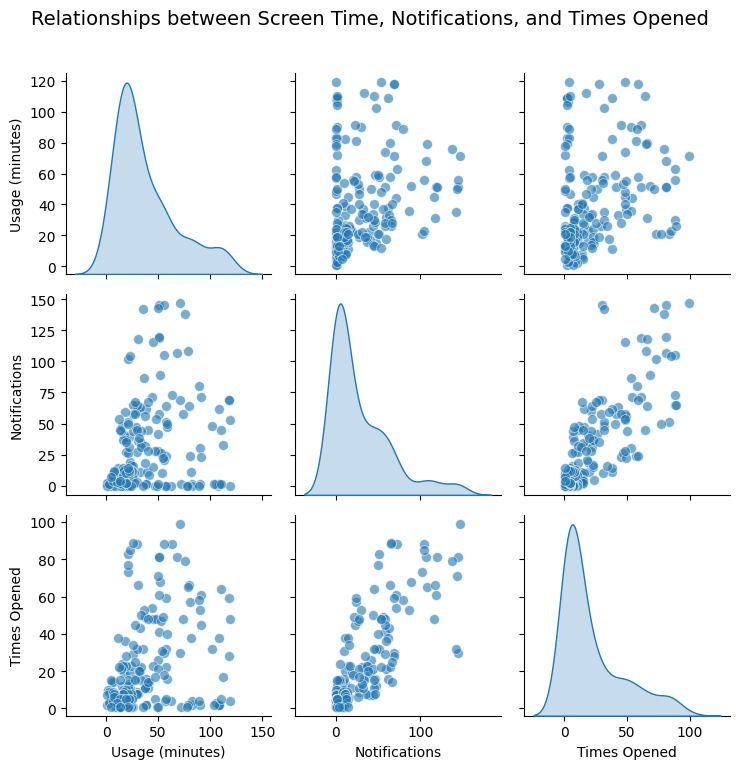

In [5]:
plt.figure(figsize=(8, 6))

pairplot = sns.pairplot(
    data[['Usage (minutes)', 'Notifications', 'Times Opened']],
    kind="scatter",
    diag_kind="kde",
    plot_kws={'alpha':0.6, 's':50}
)

pairplot.fig.suptitle('Relationships between Screen Time, Notifications, and Times Opened', y=1.02, fontsize=14)

plt.tight_layout()

plt.show()

The above pair plot shows relationships between screen time (usage in minutes), notifications, and times an app was opened. The scatter plots indicate a moderate positive correlation between notifications and times opened, as well as between times opened and usage minutes, which suggests that more notifications lead to more app usage and openings. However, the correlation between usage and notifications is weaker, showing that receiving many notifications does not always result in higher screen time. The histograms on the diagonal also show that most data points cluster around low values for usage, notifications, and times opened.

Now, let’s analyze the top apps based on screen time and break down the average usage, notifications, and times opened per app. It will give us a clearer picture of user behaviour across apps:

In [6]:
app_analysis = data.groupby('App').agg(
    avg_usage=('Usage (minutes)', 'mean'),
    avg_notifications=('Notifications', 'mean'),
    avg_times_opened=('Times Opened', 'mean')
).reset_index()

app_analysis = app_analysis.sort_values(by='avg_usage', ascending=False)

app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


The table displays the average screen time usage, notifications, and times opened for each app. Here are the key insights:

Instagram: This app leads in both screen time and notifications, averaging about 76 minutes of usage per day, with 49 notifications and being opened around 41 times.

WhatsApp: It ranks second in terms of times opened (averaging 68 times), with a very high number of notifications (around 100), though its screen time is lower than Instagram and Netflix.

Netflix: Users spend significant time on Netflix (72 minutes/day), but it stands out for its low interaction frequency, with only 2.56 app opens and almost no notifications. This reflects the nature of long, continuous usage (e.g., watching shows or movies).

Other Apps: Apps like Facebook, LinkedIn, and Safari have lower usage and interaction metrics, showing they are used less frequently and for shorter sessions.

Now, let’s have a look at the average screen time of the user by day of the week:

<ipython-input-7-b30fa1a673eb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")


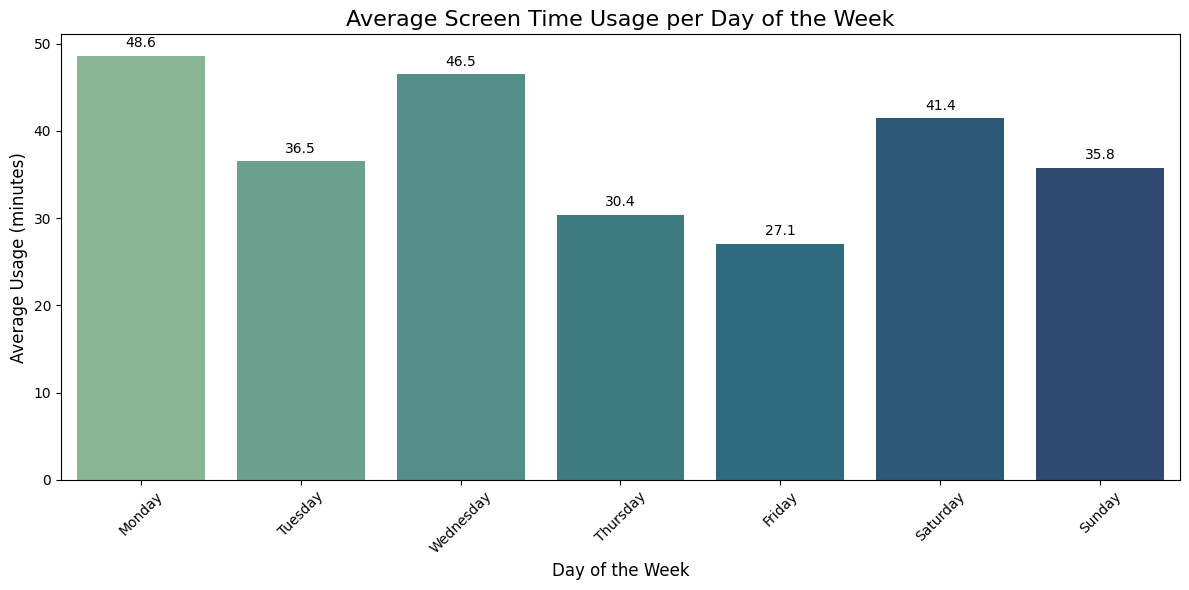

In [7]:
data['Day of Week'] = data['Date'].dt.day_name()

weekly_usage = data.groupby('Day of Week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

The highest usage occurs on Monday (48.6 minutes) and Wednesday (46.5 minutes), which indicates that the beginning and middle of the week see the most screen time. Usage decreases towards the end of the week, with Friday having the lowest average (27.1 minutes). Screen time increases again on Saturday (41.4 minutes) and slightly drops on Sunday (35.8 minutes). This pattern suggests higher screen engagement during workdays and moderate usage over the weekend.


Now, let’s analyze the daily patterns for the top three apps: Instagram, Netflix, and WhatsApp. It will give us insights into how users engage with these apps throughout the week:

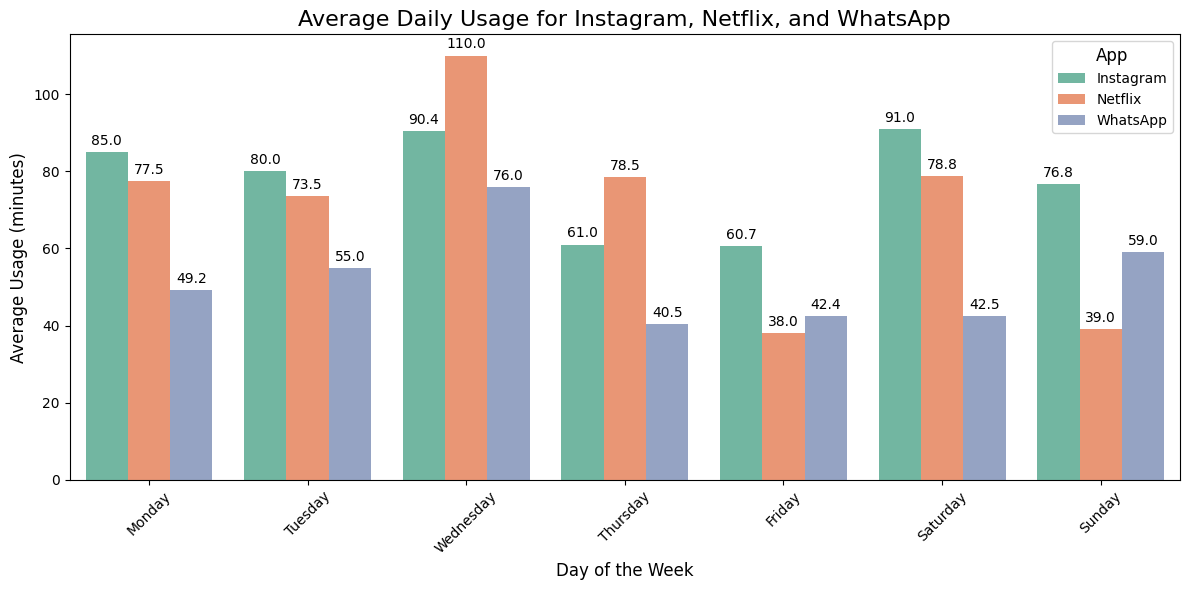

In [8]:
top_apps_data = data[data['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'],
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()

plt.figure(figsize=(12, 6))

ax = sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 8), textcoords='offset points')

plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='App', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

Instagram consistently has the highest usage, especially on Saturday (91.0 minutes) and Wednesday (90.4 minutes). Netflix usage peaks on Wednesday (110.0 minutes) and Saturday (78.8 minutes), which shows strong mid-week and weekend engagement. WhatsApp usage is generally lower than Instagram and Netflix, with its highest usage on Sunday (59.0 minutes) and Wednesday (76.0 minutes). Overall, Wednesday and Saturday are the days with the highest overall screen time across these three apps.

Calculating the Probability of App Openings Through Notifications
Now, we will calculate the probability of the user opening the app from each notification. To calculate the probability of a user opening each app when there is a notification, we can use the following approach:

Step 1: Calculate the number of instances where there were notifications (Notifications > 0).
Step 2: Calculate how often the app was opened on those days (Times Opened > 0).
In this scenario, the probability can be calculated as:

P(Open|Notification) = Number of days the app was opened when notifications were received​ / Total number of days notifications were received

I will calculate this for each app in the dataset:

In [9]:
notifications_data = data[data['Notifications'] > 0]

app_opened_when_notif = notifications_data.groupby('App').apply(
    lambda x: (x['Times Opened'] > 0).sum() / len(x)
).reset_index(name='Probability of Open with Notification')

app_opened_when_notif

<ipython-input-9-9b8aac9658e6>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  app_opened_when_notif = notifications_data.groupby('App').apply(


,App,Probability of Open with Notification
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0


For all listed apps, including 8 Ball Pool, Facebook, Instagram, LinkedIn, Netflix, Safari, WhatsApp, and X (formerly Twitter), the probability is 1.0, which means that every time a notification is received for any of these apps, the user opens the app. It indicates a strong responsiveness to notifications across all the apps, which suggests that notifications are a highly effective way to prompt user engagement for these applications. Conversely, if the user wants to decrease screen time, the first step should be to turn off the notifications.